#1. Importing packages

In [ ]:
#Import Library

import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
#I'll take the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/orbit2023/praktikumcv/ofa-ai-mastery-computer-vision'

In [ ]:
#Read the dataset

names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,deer,600
1,cat,700
2,dog,900
3,horse,600


<Axes: xlabel='Name of class', ylabel='Number of samples'>

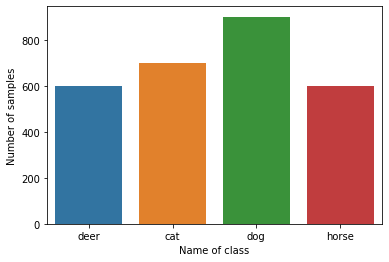

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

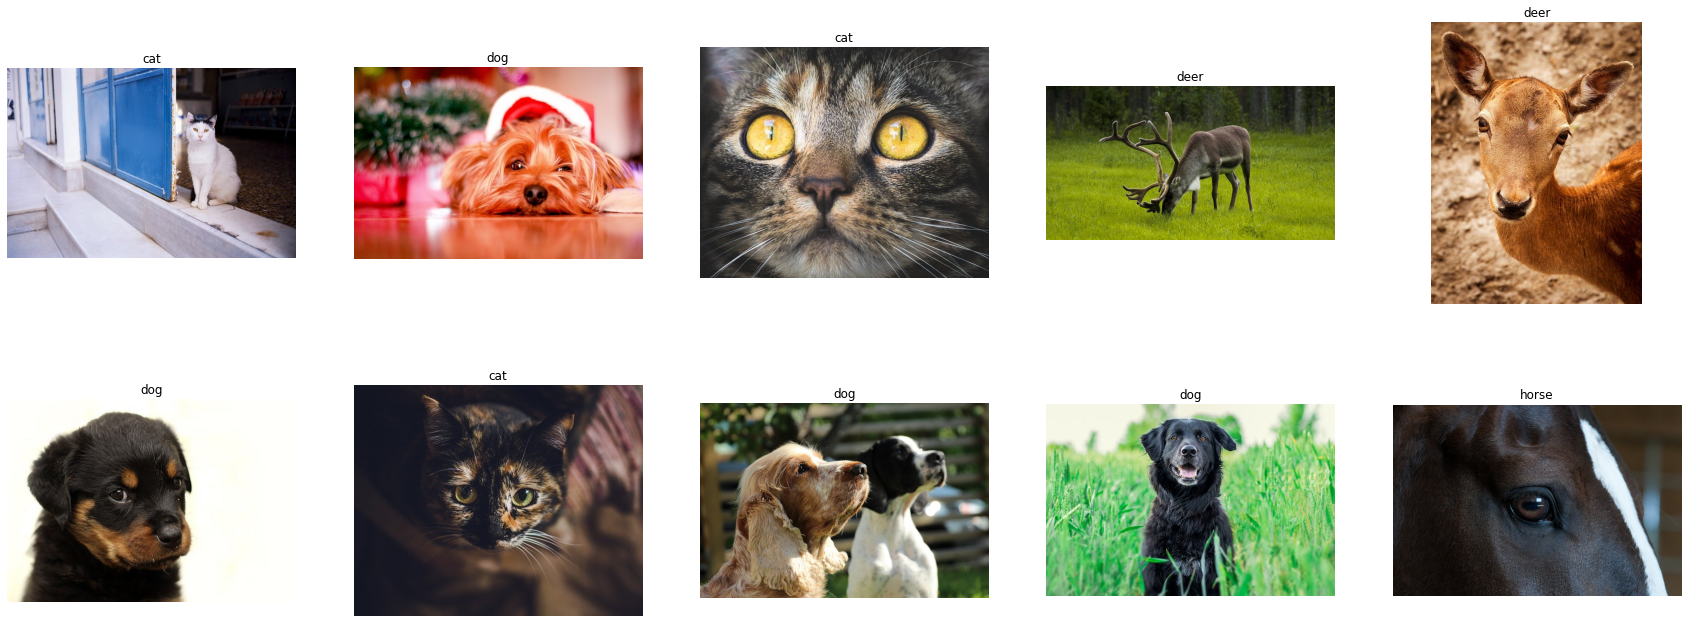

In [ ]:
#Show the images form dataset

classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preprocessing Data

In [ ]:
#Preprocessing
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [ ]:
#Count the data train and data testing
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

In [ ]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer with the activation relu

inception = tf.keras.applications.inception_v3.InceptionV3(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(inception)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# i'll use learning rate = 0,0005 with momentum = 0,9
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                 2052      
                                                        

# 5. Training and evaluating

In [ ]:
#  i'll use epoch = 40
history = model.fit(train_ds , validation_data = val_ds , epochs = 40)

Epoch 1/40
70/70 [==============================] - 841s 12s/step - loss: 1.0446 - accuracy: 0.6286 - val_loss: 0.3420 - val_accuracy: 0.9268
Epoch 2/40
70/70 [==============================] - 768s 11s/step - loss: 0.4463 - accuracy: 0.8857 - val_loss: 0.1782 - val_accuracy: 0.9518
Epoch 3/40
70/70 [==============================] - 800s 11s/step - loss: 0.2592 - accuracy: 0.9246 - val_loss: 0.1433 - val_accuracy: 0.9482
Epoch 4/40
70/70 [==============================] - 798s 11s/step - loss: 0.1895 - accuracy: 0.9384 - val_loss: 0.1529 - val_accuracy: 0.9446
Epoch 5/40
70/70 [==============================] - 763s 11s/step - loss: 0.1491 - accuracy: 0.9558 - val_loss: 0.1439 - val_accuracy: 0.9536
Epoch 6/40
70/70 [==============================] - 799s 11s/step - loss: 0.1196 - accuracy: 0.9634 - val_loss: 0.1217 - val_accuracy: 0.9679
Epoch 7/40
70/70 [==============================] - 796s 11s/step - loss: 0.1167 - accuracy: 0.9612 - val_loss: 0.1423 - val_accuracy: 0.9607
Epoch 

18/18 [==============================] - 46s 3s/step - loss: 0.1535 - accuracy: 0.9607


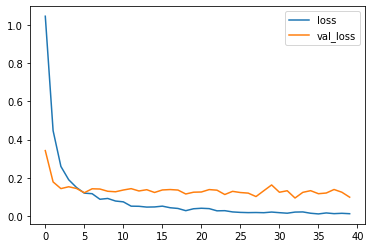

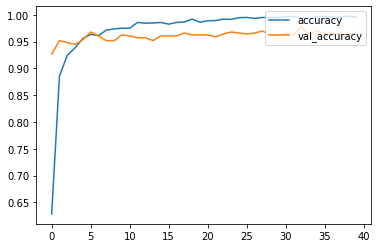

In [ ]:
#evaluating

model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission

In [ ]:
#create the path 
sub_csv ='/content/drive/MyDrive/orbit2023/praktikumcv/ofa-ai-mastery-computer-vision/Sample_submission.csv'
path_test = path = '/content/drive/MyDrive/orbit2023/praktikumcv/ofa-ai-mastery-computer-vision/test/test'



In [ ]:
# show 10 data
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


1/1 [==============================] - 0s 104ms/step


In [ ]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [ ]:
# saving file

df_sub.to_csv('submission.csv',index=False)